<a href="https://colab.research.google.com/github/Daniil71/analysis_researches/blob/main/Protests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import requests


# url = https://www.kaggle.com/datasets/kkhandekar/global-protest-tracker
df = pd.read_csv('gpt.csv')
df.head()

,Country,Protest Name,Start Date,Freedom Rating (Status),Triggers,Motivations,Peak Size,Key Participants,Duration,Outcomes,...,Economic motivation?,Political motivation?,Corruption motivation?,Size category,Protests with a significant outcome,"Large protests (Over 100,000 protesting)",Violent government response,Long protests (more than 3 months),Coronavirus-related protests,Capital city
0,Argentina,Agricultural policy protests,Apr-22,Free,The government's adoption of interventionist p...,Frustration with high tax rates and persistent...,">1,000",Farmers.,Active,No policy/leadership change in response to pro...,...,X,X,NaN,Thousands,NaN,NaN,NaN,NaN,NaN,Buenos Aires
1,Armenia,Peace plan protests,Nov-20,Partly free,Announcement of a Russian-brokered peace deal ...,Nationalist sentiment and a belief in Armenian...,">1,000",Coalition of seventeen opposition parties and ...,6 months in 2020–2021; Active as of May 2022,No policy or leadership change in response to ...,...,NaN,X,NaN,Thousands,NaN,NaN,NaN,X,NaN,Yerevan
2,Brazil,Indigenous land rights protests,Jun-21,Free,President Jair Bolsonaro's administration's su...,Anger over economic exploitation of Indigenous...,">4,000",Indigenous groups.,Active,The Brazilian Supreme Court suspended the land...,...,NaN,X,NaN,Thousands,X,NaN,NaN,NaN,NaN,Brasilia
3,Canada,Coronavirus restrictions protests,Apr-20,Free,"Enactment of coronavirus restrictions, includi...","Skepticism of coronavirus, vaccines, and conce...",">1,000",General public; truckers.,Active,No policy/leadership change in response to the...,...,X,NaN,X,Thousands,NaN,NaN,X,NaN,X,Ottawa
4,Iran,Public sector employees protests,Jan-22,Not free,Rising costs of living and stagnating salaries...,Frustration with the government's slow impleme...,>1000,"Public sector employees, including nurses and ...",Active,No policy/leadership change in response to pro...,...,X,NaN,NaN,Thousands,NaN,NaN,NaN,NaN,NaN,Tehran


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Country                                   329 non-null    object
 1   Protest Name                              329 non-null    object
 2   Start Date                                329 non-null    object
 3   Freedom Rating (Status)                   329 non-null    object
 4   Triggers                                  329 non-null    object
 5   Motivations                               329 non-null    object
 6   Peak Size                                 329 non-null    object
 7   Key Participants                          328 non-null    object
 8   Duration                                  329 non-null    object
 9   Outcomes                                  328 non-null    object
 10  Active protests                           17 non-n

In [72]:
# найдём все категориальные атрибуты - в данном случае с 1 уникальным значением
df.nunique()

Country                                     126
Protest Name                                263
Start Date                                   66
Freedom Rating (Status)                       4
Triggers                                    327
Motivations                                 322
Peak Size                                    53
Key Participants                            174
Duration                                     47
Outcomes                                    119
Active protests                               1
Economic motivation?                          1
Political motivation?                         1
Corruption motivation?                        1
Size category                                11
Protests with a significant outcome           1
Large protests (Over 100,000 protesting)      1
Violent government response                   1
Long protests (more than 3 months)            1
Coronavirus-related protests                  1
Capital city                            

In [73]:
# Заменим наны и иксы в колонках на 1 и 0 и приведём к целочисленному типу
df[['Active protests','Economic motivation?',
       'Political motivation?', 'Corruption motivation?','Protests with a significant outcome',
       'Large protests (Over 100,000 protesting)',
       'Violent government response', 'Long protests (more than 3 months)',
       'Coronavirus-related protests']] = df[['Active protests','Economic motivation?',
       'Political motivation?', 'Corruption motivation?','Protests with a significant outcome',
       'Large protests (Over 100,000 protesting)',
       'Violent government response', 'Long protests (more than 3 months)',
       'Coronavirus-related protests']].fillna(0).replace('X',1).apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Country                                   329 non-null    object
 1   Protest Name                              329 non-null    object
 2   Start Date                                329 non-null    object
 3   Freedom Rating (Status)                   329 non-null    object
 4   Triggers                                  329 non-null    object
 5   Motivations                               329 non-null    object
 6   Peak Size                                 329 non-null    object
 7   Key Participants                          328 non-null    object
 8   Duration                                  329 non-null    object
 9   Outcomes                                  328 non-null    object
 10  Active protests                           329 non-

In [74]:
# Даты изначально даны в формате object. Одна из дат отличается вариантом написания года. 
df['Start Date'].unique()

array(['Apr-22', 'Nov-20', 'Jun-21', 'Apr-20', 'Jan-22', 'Oct-19',
       'May-21', 'Feb-22', 'Feb-21', 'Mar-22', 'Jun-20', 'Jul-20',
       'Sep-21', 'Aug-21', 'Nov-19', 'Nov-18', 'Jun-17', 'Dec-20',
       'Feb-19', 'Dec-21', 'Aug-20', 'Sep-18', 'Apr-18', 'Jul-21',
       'Mar-21', 'Jan-20', 'Nov-21', 'Oct-17', 'Jan-19', 'Feb-18',
       'Oct-20', 'Jul-18', 'Jul-19', 'Feb-17', 'Jan-21', 'Apr-21',
       'Mar-19', 'Mar-18', 'Mar-20', 'May-19', 'May-20', 'Oct-18',
       'Sep-20', 'Jun-18', 'Apr-19', 'Oct-21', 'Dec-17', 'Jul-17',
       'Sep-19', 'May-22', 'Dec-19', 'Sep-17', 'Jun-19', 'Feb-20',
       'Aug-17', 'Dec-18', 'Apr-17', 'Aug-19', 'Aug-18', 'May-18',
       'Jan-18', 'Nov-17', 'Feb-2018', 'Jan-17', 'Mar-17', 'Oct-16'],
      dtype=object)

In [75]:
# Заменим и приведём к datetime (дни нам не даны, так что каждый протест начинается с первого числа месяца)
df.update(df.loc[df['Start Date'] == 'Feb-2018','Start Date'].replace('Feb-2018','Feb-18'))
df['Start Date'] = pd.to_datetime(df['Start Date'], format = '%b-%y')
df['Start Date']

0     2022-04-01
1     2020-11-01
2     2021-06-01
3     2020-04-01
4     2022-01-01
         ...    
324   2021-03-01
325   2018-09-01
326   2019-01-01
327   2018-08-01
328   2017-11-01
Name: Start Date, Length: 329, dtype: datetime64[ns]

In [76]:
df['Duration'].value_counts()

1 day                                                    57
1 week                                                   50
1 month                                                  44
2 months                                                 32
Active                                                   16
2 weeks                                                  15
4 months                                                 15
5 months                                                 11
3 months                                                 10
3 weeks                                                   9
14 months                                                 6
8 months                                                  5
1 year                                                    4
6 months                                                  4
3 days                                                    4
10 days                                                   3
1 year, intermittently                  

In [77]:
# С длительностью сложнее.
def changer(row):
    """
    функция отбирает из строки с длительностью сочетания типа "7 days" или "15 months" и возвращает именно количество дней 
    """
    row = re.findall('\d+ \w+', row)
    for i in range(len(row)):
        row[i] = row[i].replace('years','*365').replace('year','*365').replace('months','*30.5')\
            .replace('month','*30.5').replace('weeks','*7').replace('week','*7').replace('days','*1').replace('day','*1').replace('to','')
        try:
            row[i] = eval(row[i])
        except:
            return row[i]


   
    return round(sum(row))
  
df['Days_of_duration'] = df[df['Duration'] != 'Active']['Duration'].apply(changer)

# отдельно высчитеаем длительность для активных протестов, взяв  1 мая 22 года за максимальную дату(датасет включает данные по май 2022)
df.loc[df['Days_of_duration'].isna(),'Days_of_duration'] = \
    df.loc[df['Days_of_duration'].isna(),'Days_of_duration'].fillna(pd.to_datetime('2022-05-01')-df['Start Date']).dt.days

# и переведём в целые числа
df['Days_of_duration'] = df['Days_of_duration'].astype('int32')

In [78]:
df[['Start Date','Duration','Days_of_duration']].tail(10)

,Start Date,Duration,Days_of_duration
319,2019-01-01,"1 year, 3 months",456
320,2017-04-01,3 months,92
321,2018-06-01,1 week,7
322,2021-06-01,3 months,92
323,2021-09-01,2 months,61
324,2021-03-01,1 day,1
325,2018-09-01,1 month,30
326,2019-01-01,1 month,30
327,2018-08-01,1 week,7
328,2017-11-01,1 day,1


In [79]:
# в столбце с участниками есть одно пропущенное значе6ние
df[df['Key Participants'].isna()==True]

,Country,Protest Name,Start Date,Freedom Rating (Status),Triggers,Motivations,Peak Size,Key Participants,Duration,Outcomes,...,Political motivation?,Corruption motivation?,Size category,Protests with a significant outcome,"Large protests (Over 100,000 protesting)",Violent government response,Long protests (more than 3 months),Coronavirus-related protests,Capital city,Days_of_duration
328,Zimbabwe,Mugabe protest,2017-11-01,Not free,"Military takeover of power, after which protes...",Desire for political reforms and repression un...,">10,000",NaN,1 day,Mugabe stepped down and was replaced by Emmers...,...,0,0,Thousands,0,0,0,0,0,Harare,1


In [80]:
# Заменим на 'General public.'. Помимо того, что это мода атрибута, описание протеста подразумевает массовый общественный характер
df['Key Participants'] = df['Key Participants'].fillna('General public.')

In [81]:
# посмотрим на ключевых участников 
print('Всего уникальных значений: ', df['Key Participants'].nunique())
print('')
df['Key Participants'].value_counts()

Всего уникальных значений:  174



General public.                                                                  127
General public, especially youth.                                                  5
General public, especially women.                                                  5
Women.                                                                             4
Students.                                                                          4
                                                                                ... 
Secondary school students.                                                         1
Opposition party members, especially members of the United National Movement.      1
General public, especially opposition politicians.                                 1
Right- and left-wing extremists, conspiracy theorists, antivaccine groups.         1
Retired soldiers and public workers.                                               1
Name: Key Participants, Length: 174, dtype: int64

In [82]:
# теперь распределим всех протестующих на три группы и создадим новый атрибут

def div_participants(row):
    """
    функция определяет, в какую группу протест по типу протестующих
    """
    if row =='General public.' or row =='General public':
        return 1
    elif 'General public' in row:
        return 2
    else:
       return 3
    
df['Type_of_partitipants'] = df['Key Participants'].apply(div_participants)
df[['Key Participants','Type_of_partitipants']].head(10)

,Key Participants,Type_of_partitipants
0,Farmers.,3
1,Coalition of seventeen opposition parties and ...,3
2,Indigenous groups.,3
3,General public; truckers.,2
4,"Public sector employees, including nurses and ...",3
5,"Young people (especially young men), universit...",3
6,Palestinians.,3
7,General public.,1
8,General public.,1
9,General public.,1


In [83]:
# степень свободы общества
df['Freedom Rating (Status)'].value_counts()

Partly free     117
Free            109
Not free        102
Partly freee      1
Name: Freedom Rating (Status), dtype: int64

In [84]:
def freedom_grader(row):
    """
    переводит степень свободы общества в числолвую шкалу
    """
    if row == 'Not free':
        return 1
    if row == 'Partly free' or row == 'Partly freee':
        return 2
    if row == 'Free':
        return 3

df['Degree_of_freedom'] = df['Freedom Rating (Status)'].apply(freedom_grader)

In [85]:
# это ещё не всё. Несколько стран не определилсиь со своей свободностью.
df.groupby('Country')['Degree_of_freedom'].nunique().sort_values()

Country
Afghanistan        1
Paraguay           1
Pakistan           1
Oman               1
North Macedonia    1
                  ..
Gambia             1
Hungary            2
Serbia             2
Benin              2
Peru               2
Name: Degree_of_freedom, Length: 126, dtype: int64

In [86]:
# Легче всего проверить их вручную и убедиться, что мода в каждом случае - 2('Partly free'). Заменим.

#df[df['Country'] == 'Serbia']['Degree_of_freedom']
#df[df['Country'] == 'Hungary']['Degree_of_freedom']
#df[df['Country'] == 'Benin']['Degree_of_freedom']
#df[df['Country'] == 'Peru']['Degree_of_freedom']

df.loc[df['Country'] == 'Serbia','Degree_of_freedom'] = 2
df.loc[df['Country'] == 'Peru','Degree_of_freedom'] = 2
df.loc[df['Country'] == 'Benin','Degree_of_freedom'] = 2
df.loc[df['Country'] == 'Hungary','Degree_of_freedom'] = 2
df.groupby('Country')['Degree_of_freedom'].nunique().sort_values()

Country
Afghanistan    1
Peru           1
Paraguay       1
Pakistan       1
Oman           1
              ..
Ethiopia       1
Eswatini       1
El Salvador    1
Haiti          1
eSwatini       1
Name: Degree_of_freedom, Length: 126, dtype: int64

In [87]:
# Размеры протеста
df['Size category'].value_counts()

Thousands                   152
Tens of thousands            98
Hundreds of thousands        31
Hundreds                     26
Over 1 million                7
Hundreds of of thousands      6
Unknown                       3
Millions                      2
Thosuands                     2
Huundreds of thousands        1
Tens of millions              1
Name: Size category, dtype: int64

In [88]:
df[df['Size category'] == 'Unknown']

,Country,Protest Name,Start Date,Freedom Rating (Status),Triggers,Motivations,Peak Size,Key Participants,Duration,Outcomes,...,Size category,Protests with a significant outcome,"Large protests (Over 100,000 protesting)",Violent government response,Long protests (more than 3 months),Coronavirus-related protests,Capital city,Days_of_duration,Type_of_partitipants,Degree_of_freedom
46,Belarus,Russian integration protests,2019-07-01,Not free,A series of meetings between Belarusian Presid...,Opposition to deepening ties between Russia an...,">1,000",General public.,5 months,No policy/leadership change in response to pro...,...,Unknown,1,0,1,0,1,Minsk,152,1,1
125,Germany,Police brutality protests,2020-06-01,Free,"Death of George Floyd in the United States, sp...","Police brutality, systemic racism, and lack of...",">100,000",General public.,1 month,No policy/leadership change in response to the...,...,Unknown,0,0,1,0,1,Berlin,30,1,3
137,Haiti,Tax protests,2017-09-01,Partly free,"Introduction of new taxes on cigarettes, passp...","Anger over the increasing cost of living, lack...",">1,000",General public.,2 months,No policy/leadership change in response to pro...,...,Unknown,0,0,0,0,1,Port-au-Prince,61,1,2


In [89]:
def size_grader(row):
   
    if row == 'Hundreds' or row == 'Thosuands' or row == 'Thousands':
        return 1
    elif row == 'Tens of thousands':
        return 2
    elif row == 'Huundreds of thousands' or row == 'Hundreds of thousands' or row == 'Hundreds of of thousands':
        return 3
    elif row == 'Millions' or row == 'Over 1 million' or row == 'Tens of millions':
        return 4


df['Size_in_1000'] = df['Size category'].apply(size_grader)

# Для unknown значения придётся подставить вручную, основываясь, за неимением лучшего показателя, на Peak size
df.loc[df.index == 46,'Size_in_1000'] = 1
df.loc[df.index == 125, 'Size_in_1000'] = 3
df.loc[df.index == 137,'Size_in_1000'] = 1

In [90]:
df[df['Country'] == 'Russia'][['Protest Name','Start Date','Peak Size', 'Size_in_1000', 'Size category']]

,Protest Name,Start Date,Peak Size,Size_in_1000,Size category
11,Ukraine invasion protests,2022-02-01,">10,000",2.0,Tens of thousands
249,Aleksei Navalny arrest protests,2021-01-01,">100,000",3.0,Hundreds of of thousands
250,Khabarovsk protests,2020-07-01,"50,000",2.0,Tens of thousands
251,Coronavirus restrictions protest,2020-04-01,"2,000",1.0,Thousands
252,Constitutional changes protests,2020-02-01,"22,000",1.0,Thousands
253,Moscow election protests,2019-07-01,"50,000",1.0,Thousands
254,Corruption protest,2017-03-01,"60,000",1.0,Thousands


In [91]:
# легко можно увидеть, что атрибуты Peak Size и Size_in_1000 часто сильно расходятся, при этом записи в Peak Size плохо унифицированы. 
# В итоге для оценки размера оставим только размер в тысячах
df[['Peak Size','Size_in_1000']].value_counts().head(20)

Peak Size   Size_in_1000
>1,000      1.0             71
>10,000     2.0             37
            1.0             24
>5,000      1.0             23
>1,000      2.0             22
>500        1.0             12
>1,000      3.0             11
>100,000    3.0             11
            1.0              7
>500        2.0              5
>1,000,000  4.0              5
20,000      2.0              4
>10,000     3.0              4
800,000     2.0              3
20,000      1.0              3
>1,000      4.0              3
>2,000      1.0              3
50,000      1.0              3
>4,000      1.0              3
>100        1.0              2
dtype: int64

In [92]:
# итак, у нас есть размер протеста в тысячах
# Однако, кажется разумным предположить, что размер важен не только своим абсолютным значением,
# что важным может быть и соотношение размера протеста с размером населения страны.
# стотысячный протест в небольшом государстве при прочих равных должен иметь больший эффект,
# чем стотысячный протест в Индии с 1.5 миллиардами населения.
# Поэтому возьмём с Википедии данные по населению имеющихся у нас стран(годом при это пренебрежём - 
# 5 лет относительно небольшой промежуток)
url="https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"

response = requests.get(
	url=url,
)
print(response.status_code)

200


In [93]:
table = pd.read_html(url)[0]
population = table[['Country / Dependency','Population']]
population.head()

,Country / Dependency,Population
0,World,7976074000
1,China,1412600000
2,India,1375586000
3,United States,333066256
4,Indonesia,275773800


In [94]:
# объединим, возьмём популяцию измеренную также в 1000, удалим лишние атрибуты
df = df.merge(population, left_on = 'Country', right_on = 'Country / Dependency')
df['Population_in_1000'] = round(df['Population']/1000)
df['Protest/population_ratio'] = df['Size_in_1000']/df['Population_in_1000']
df = df.drop(['Country / Dependency','Population'], axis = 1)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 0 to 317
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Country                                   318 non-null    object        
 1   Protest Name                              318 non-null    object        
 2   Start Date                                318 non-null    datetime64[ns]
 3   Freedom Rating (Status)                   318 non-null    object        
 4   Triggers                                  318 non-null    object        
 5   Motivations                               318 non-null    object        
 6   Peak Size                                 318 non-null    object        
 7   Key Participants                          318 non-null    object        
 8   Duration                                  318 non-null    object        
 9   Outcomes                        

In [96]:
protests = df
protests.columns

Index(['Country', 'Protest Name', 'Start Date', 'Freedom Rating (Status)',
       'Triggers', 'Motivations', 'Peak Size', 'Key Participants', 'Duration',
       'Outcomes', 'Active protests', 'Economic motivation?',
       'Political motivation?', 'Corruption motivation?', 'Size category',
       'Protests with a significant outcome',
       'Large protests (Over 100,000 protesting)',
       'Violent government response', 'Long protests (more than 3 months)',
       'Coronavirus-related protests', 'Capital city', 'Days_of_duration',
       'Type_of_partitipants', 'Degree_of_freedom', 'Size_in_1000',
       'Population_in_1000', 'Protest/population_ratio'],
      dtype='object')

In [97]:
# 5% протестов активны на данный момент
# ~35% протестов - имеют экономические причины, ~87% - политические, 20% - касаются проблем коррупции
# 30% протестов имели значимый результат
# ~27% протестов жёстко подавлялись властями
# ~ 24% длились дольше 3 месяцев и среднее количество дней проетста - 113(но здесь разумней смотреть медиану - она всего 30 дней(месяц))
# участники протестов в среднем(и по медиане) - не просто general public
# половина протестов  - протесты в 1000 человек(средняя в 73 тысячи очень сбивается из-за высокой дисперсии)
protests.describe()

,Active protests,Economic motivation?,Political motivation?,Corruption motivation?,Protests with a significant outcome,"Large protests (Over 100,000 protesting)",Violent government response,Long protests (more than 3 months),Coronavirus-related protests,Days_of_duration,Type_of_partitipants,Degree_of_freedom,Size_in_1000,Population_in_1000,Protest/population_ratio
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,3.180000e+02,3.180000e+02
mean,0.053459,0.361635,0.867925,0.201258,0.298742,0.147799,0.270440,0.242138,0.150943,111.977987,2.059748,2.034591,1.610063,9.278820e+04,2.396819e-04
std,0.225302,0.481231,0.339106,0.401572,0.458428,0.355460,0.444887,0.429053,0.358558,199.462803,0.915800,0.791555,0.801512,2.311944e+05,7.606860e-04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.830000e+02,7.269629e-07
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,1.000000,1.000000,1.018600e+04,2.108237e-05
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,2.000000,2.000000,1.000000,2.870500e+04,5.131448e-05
75%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,122.000000,3.000000,3.000000,2.000000,6.791800e+04,1.529969e-04
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2042.000000,3.000000,3.000000,4.000000,1.375586e+06,7.832898e-03


Визуализация

Text(0.5, 1.0, 'Count of protest by size in 1000')

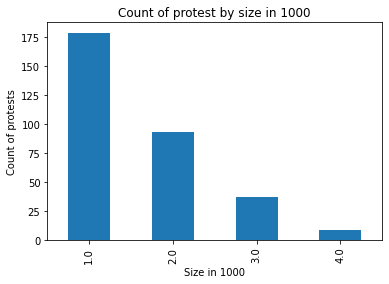

In [98]:
protests['Size_in_1000'].value_counts().sort_index().plot(kind = 'bar')
plt.xlabel('Size in 1000')
plt.ylabel('Count of protests')
plt.title('Count of protest by size in 1000')

Text(0.5, 1.0, 'Top-20 countries by num of protests since 2017')

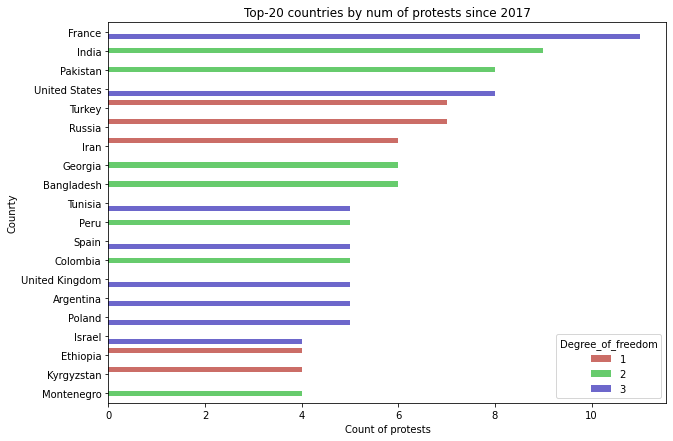

In [99]:
plt.figure(figsize = [10,7])  
top_20 = pd.DataFrame(protests.groupby('Country')['Country'].count().reset_index(name = 'Count').sort_values(by = 'Count',ascending = False)[:20])
top_20 = top_20.join(protests[['Country', 'Degree_of_freedom']].set_index('Country'), on = 'Country').drop_duplicates()
sns.barplot(y = top_20['Country'],x = top_20['Count'], hue = top_20['Degree_of_freedom'], palette = 'hls')
plt.ylabel('Counrty')
plt.xlabel('Count of protests')
plt.title('Top-20 countries by num of protests since 2017')

# По уровню свободы

In [100]:
# процент результативных протестов в контексте уровня свободы
protests.groupby('Degree_of_freedom')['Protests with a significant outcome'].mean()

Degree_of_freedom
1    0.308511
2    0.294118
3    0.295238
Name: Protests with a significant outcome, dtype: float64

In [101]:
# то же в абсолютных величинах. Видим, что нет заметной разницы
protests.groupby('Degree_of_freedom')['Protests with a significant outcome'].value_counts()

Degree_of_freedom  Protests with a significant outcome
1                  0                                      65
                   1                                      29
2                  0                                      84
                   1                                      35
3                  0                                      74
                   1                                      31
Name: Protests with a significant outcome, dtype: int64

Text(0.5, 1.0, 'Mnean population in 1000 by degree of freedom')

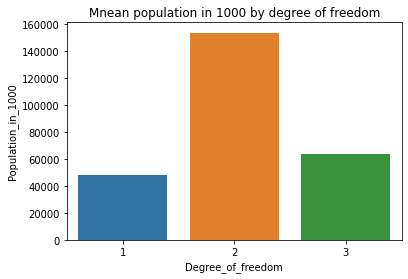

In [102]:
# в частично свободных странах население в разы превышает остальные группы
pop_by_freedom = protests.groupby('Degree_of_freedom')['Population_in_1000'].mean()
sns.barplot(x = pop_by_freedom.index, y = pop_by_freedom)
plt.title('Mnean population in 1000 by degree of freedom')

Text(0.5, 1.0, 'Count of protests by degree_of_freedom')

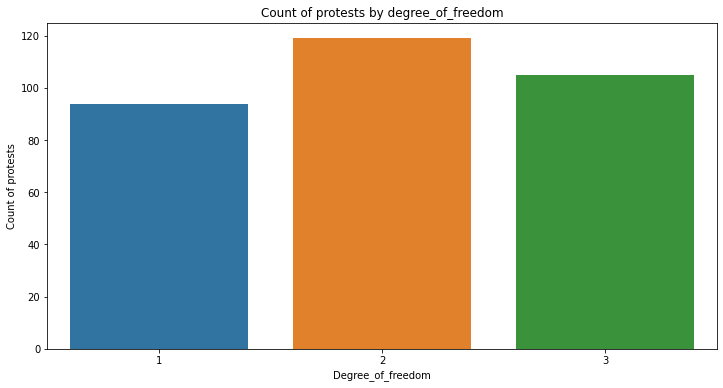

In [103]:
# поизучаем различия между странами в контексте уровня свободы
# Видим, что больше всего протестов в частично свободных странах 
by_d_of_frd = protests.groupby('Degree_of_freedom')['Country'].count()

plt.figure(figsize = [12,6])  
sns.barplot(x = by_d_of_frd.index, y = by_d_of_frd)
plt.xlabel('Degree_of_freedom')
plt.ylabel('Count of protests')
plt.title('Count of protests by degree_of_freedom')

Text(0.5, 1.0, 'Mean size in 1000 by degree of freedom')

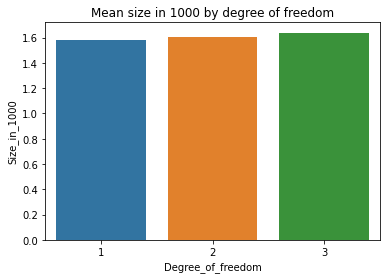

In [104]:
# Посмотрим на средние количества протестующих в 1000-ях в разрезе свободности страны
# видна очевидная разница в размерах протеста между странами
size_by_freedom = protests.groupby('Degree_of_freedom')['Size_in_1000'].mean()
sns.barplot(x = size_by_freedom.index, y = size_by_freedom)
plt.title('Mean size in 1000 by degree of freedom')

Text(0.5, 1.0, 'Mean size in 1000(between .05 quantile and .95 quantile) by degree of freedom')

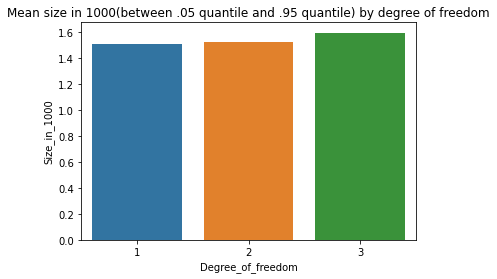

In [105]:
# При этом, стоит нам взять значения от 05 до 95 квантилей, то вся разница исчезает
adjusted = protests[protests['Size_in_1000'].between(protests['Size_in_1000'].quantile(.05),\
                                                      protests['Size_in_1000'].quantile(0.95))]
size_by_freedom = adjusted.groupby('Degree_of_freedom')['Size_in_1000'].mean()
sns.barplot(x = size_by_freedom.index, y = size_by_freedom)
plt.title('Mean size in 1000(between .05 quantile and .95 quantile) by degree of freedom')

In [106]:
# Посмотрим на соотношение размеров протеста/населения в разрезе стран
# Частично свободные страны сильно отличаются
print('Статистики по Protest/population_ratio')
protests.groupby('Degree_of_freedom')['Protest/population_ratio'].describe()

Статистики по Protest/population_ratio


,count,mean,std,min,25%,50%,75%,max
Degree_of_freedom,,,,,,,,
1,94.0,0.000101,0.000161,6.891799e-06,0.000022,0.000050,0.000097,0.000896
2,119.0,0.000397,0.001137,7.269629e-07,0.000019,0.000060,0.000243,0.007833
3,105.0,0.000185,0.000473,3.002408e-06,0.000021,0.000043,0.000184,0.003846


In [107]:
# Но если убрать выбросы, то средние и медианы становятся значительно равнее. То есть, видим ту же картину, что и средних по размеру протеста в 1000
print('Статистики по Protest/population_ratio от 5% до 95% квантилей')
adjusted = protests[protests['Protest/population_ratio'].between(protests['Protest/population_ratio'].quantile(.05),\
                                                      protests['Protest/population_ratio'].quantile(0.95))]
adjusted.groupby('Degree_of_freedom')['Protest/population_ratio'].describe()

Статистики по Protest/population_ratio от 5% до 95% квантилей


,count,mean,std,min,25%,50%,75%,max
Degree_of_freedom,,,,,,,,
1,93.0,0.000093,0.000139,0.000007,0.000022,0.000049,0.000093,0.000853
2,99.0,0.000127,0.000153,0.000004,0.000029,0.000060,0.000151,0.000804
3,95.0,0.000103,0.000126,0.000005,0.000021,0.000043,0.000171,0.000581


In [108]:
# средние по количеству дней 
protests.groupby('Degree_of_freedom')['Days_of_duration'].mean()

Degree_of_freedom
1    115.372340
2     94.571429
3    128.666667
Name: Days_of_duration, dtype: float64

Text(0.5, 1.0, 'Boxplots for days of duration by degrees of freedom')

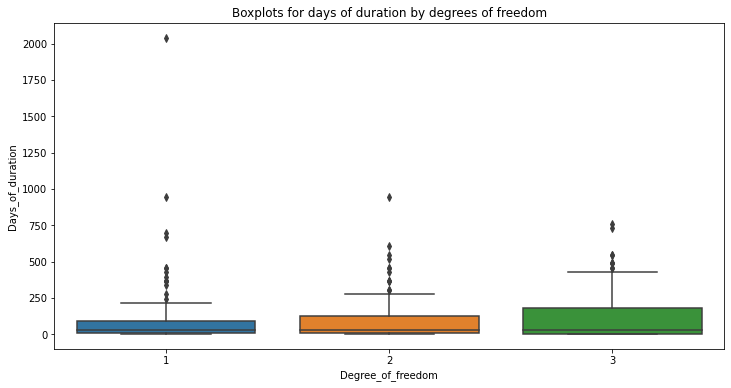

In [109]:
plt.figure(figsize = [12,6]) 
sns.boxplot(x = protests['Degree_of_freedom'], y = protests['Days_of_duration'])
plt.title('Boxplots for days of duration by degrees of freedom')

Text(0.5, 1.0, 'Boxplots for days of duration(between .05 and .95 quantiles) by degrees of freedom')

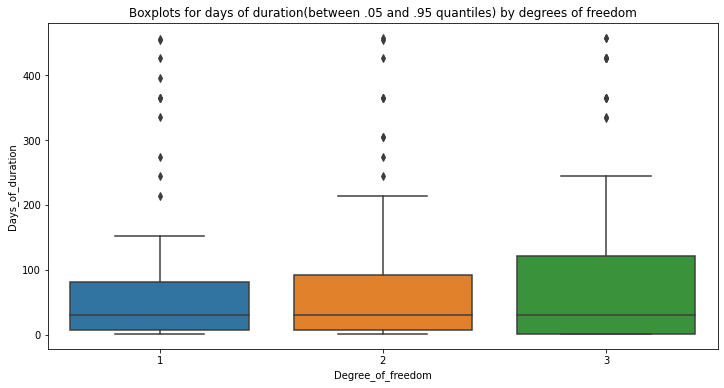

In [110]:
# Убрав верхний и нижний 5% квантили - всё равно видим примерное равенство медиан
adjusted = protests[protests['Days_of_duration'].between(protests['Days_of_duration'].quantile(.05),\
                                                      protests['Days_of_duration'].quantile(0.95))]
plt.figure(figsize = [12,6]) 
sns.boxplot(x = adjusted['Degree_of_freedom'], y = adjusted['Days_of_duration'])
plt.title('Boxplots for days of duration(between .05 and .95 quantiles) by degrees of freedom')

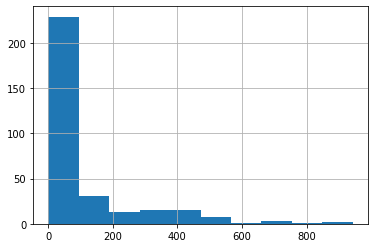

In [111]:
# Медианы групп выглядят близкими друг к другу. Заметим. что у несвободных стран коробка больше - дней больше.

# проверка на равность медиан, но для начала нужно убедиться. что данные распределены нормально.
# даже убрав самый сильный выброс(дней > 2000) - никакой нормальности нет, большинстово протестов, как мы знаем, длятся ~ 30 дней 
protests[protests['Days_of_duration']<1200]['Days_of_duration'].hist()

In [112]:
# Поэтому проверим непараметрическим аналогом - Крускал-Уоллис
# и убедимся, что нет статистически значимой разницы между тремя группами (anova тоже скажет, что отвегрнуть гипотезу о равенсте нельзя)
freedom_1 = protests[protests['Degree_of_freedom'] == 1]['Days_of_duration'].array
freedom_2 = protests[protests['Degree_of_freedom'] == 2]['Days_of_duration'].array
freedom_3 = protests[protests['Degree_of_freedom'] == 3]['Days_of_duration'].array

from scipy.stats import kruskal
kruskal(freedom_1, freedom_2, freedom_3)

KruskalResult(statistic=1.6610181106989104, pvalue=0.4358273695884499)

Text(0.5, 1.0, 'Percentage of violent government response by degree of freedom')

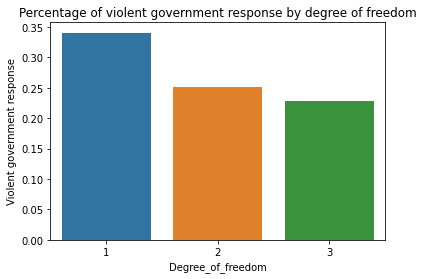

In [113]:
# Посмотрим на жёсткий ответ властей в разрезе свободности
violent_resp_by_freedom = protests.groupby('Degree_of_freedom')['Violent government response'].mean()
sns.barplot(x = violent_resp_by_freedom.index,y =  violent_resp_by_freedom)
plt.title('Percentage of violent government response by degree of freedom')

In [114]:
# Примечательный факт номер 1- в свободных странах процент протестов с жёстким подавлением выше(сразу задумываешься о критериях жестокости)
# Проверим, есть ли статистическая разница с помощью таблицы сопряжённости хи-квадрат
violence_by_freedom = protests.groupby(['Degree_of_freedom','Violent government response']).size().unstack(fill_value=0)
violence_by_freedom

Violent government response,0,1
Degree_of_freedom,,
1,62,32
2,89,30
3,81,24


In [115]:
# Прримечательный факт номер 2 - статистически значимой разницы нет.
# P-value в итоге всё равно довольно высокий и нулевую гипотезу о равенстве отвергнуть нельзя,
# но будем иметь в виду некоторую разницу по количеству жёстких ответов между свободными странами  и двумя другими группами
from scipy.stats import chi2_contingency
chi2_contingency(violence_by_freedom.values)

(3.469269267877089, 0.17646466270823208, 2, array([[68.57861635, 25.42138365],
        [86.81761006, 32.18238994],
        [76.60377358, 28.39622642]]))

Text(0.5, 1.0, 'Number of protests by types of participants and degreesof freedom')

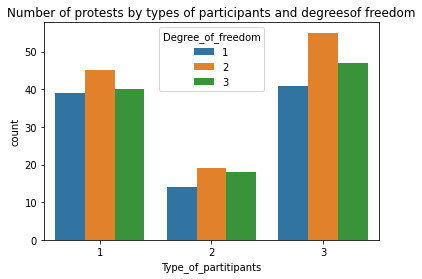

In [116]:
# отличаются ли типы участников по количеству протестов и свободности страны?
# независимо от свободности страны, мы видим очень похожие количества типов участников. 
participants_by_freedom = protests.groupby('Degree_of_freedom')['Type_of_partitipants'].value_counts().reset_index(name = 'count')
sns.barplot(hue = participants_by_freedom['Degree_of_freedom'], y = participants_by_freedom['count'],\
            x = participants_by_freedom['Type_of_partitipants'])
plt.title('Number of protests by types of participants and degreesof freedom')

In [117]:
# таблица сопряжённости и p-value подтверждают, что нет статистически начимой разницы между странами по степени их свободы и типам участников
participants_by_freedom = protests.groupby(['Degree_of_freedom','Type_of_partitipants']).size().unstack(fill_value=0)
participants_by_freedom

Type_of_partitipants,1,2,3
Degree_of_freedom,,,
1,39,14,41
2,45,19,55
3,40,18,47


In [118]:
chi2_contingency(participants_by_freedom.values)

(0.4518538552498228,
 0.9780155647949413,
 4,
 array([[36.65408805, 15.0754717 , 42.27044025],
        [46.40251572, 19.08490566, 53.51257862],
        [40.94339623, 16.83962264, 47.21698113]]))

In [119]:
# типы мотиваций в процентах по уровню свободы
# Заметим, что в свободных странах протестов по экономическим и коррупционным причинам заметно больше, чем в несвободных.
protests.groupby('Degree_of_freedom')[['Economic motivation?',
       'Political motivation?', 'Corruption motivation?']].mean()

,Economic motivation?,Political motivation?,Corruption motivation?
Degree_of_freedom,,,
1,0.393617,0.851064,0.244681
2,0.361345,0.899160,0.210084
3,0.333333,0.847619,0.152381


Итоги: Для предсказания успешности протеста уровень свободы страны незначим.

Единственное сильное отличие между странами, разделёнными по уровню свободы, которое можно обнаружить в данных - размер протеста как в абсолютных величинах, так и как отношение к размеру народонаселения. В частично свободных странах он значительно выше (абсолютные: ~ 120 тысяч протестующих в среднем против < 60 тысяч в свободных и < 40 тысяч в несвободных; относительные: среднее size/population у частично свободных в 10 раз выше, чем у двух других групп). Но это различие существует только благодаря сильным выбросам в значениях у частично свободных стран. 

# Новый раздел

# Успешность протеста

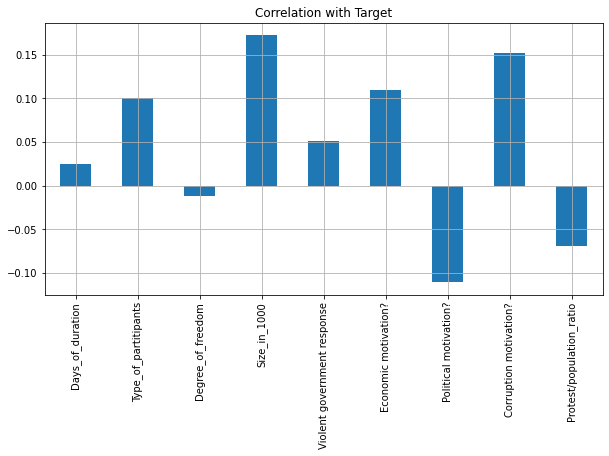

In [120]:
predictors = protests[[ 'Days_of_duration',
       'Type_of_partitipants', 'Degree_of_freedom', 'Size_in_1000','Violent government response','Economic motivation?',
       'Political motivation?', 'Corruption motivation?', 'Protest/population_ratio']]
target = protests['Protests with a significant outcome']

predictors.corrwith(target).plot.bar(figsize = (10, 5), title = "Correlation with Target", fontsize = 10,grid = True)

In [121]:
protests.columns

Index(['Country', 'Protest Name', 'Start Date', 'Freedom Rating (Status)',
       'Triggers', 'Motivations', 'Peak Size', 'Key Participants', 'Duration',
       'Outcomes', 'Active protests', 'Economic motivation?',
       'Political motivation?', 'Corruption motivation?', 'Size category',
       'Protests with a significant outcome',
       'Large protests (Over 100,000 protesting)',
       'Violent government response', 'Long protests (more than 3 months)',
       'Coronavirus-related protests', 'Capital city', 'Days_of_duration',
       'Type_of_partitipants', 'Degree_of_freedom', 'Size_in_1000',
       'Population_in_1000', 'Protest/population_ratio'],
      dtype='object')

In [122]:
protests.groupby('Protests with a significant outcome')['Days_of_duration'].mean()

Protests with a significant outcome
0    108.744395
1    119.568421
Name: Days_of_duration, dtype: float64

In [123]:
protests.groupby('Protests with a significant outcome')['Type_of_partitipants'].mean()

Protests with a significant outcome
0    2.0
1    2.2
Name: Type_of_partitipants, dtype: float64

Text(0.5, 1.0, 'Protest outcome by types_of_partitipants')

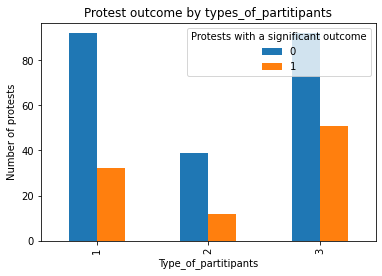

In [124]:
pd.crosstab(protests['Type_of_partitipants'], protests['Protests with a significant outcome']).plot(kind = 'bar')
plt.ylabel('Number of protests')
plt.title('Protest outcome by types_of_partitipants')

In [125]:
protests.groupby('Protests with a significant outcome')['Size_in_1000'].mean()

Protests with a significant outcome
0    1.520179
1    1.821053
Name: Size_in_1000, dtype: float64

In [126]:
protests.groupby('Protests with a significant outcome')['Protest/population_ratio'].mean()

Protests with a significant outcome
0    0.000274
1    0.000159
Name: Protest/population_ratio, dtype: float64

In [127]:
protests.groupby('Protests with a significant outcome')['Population_in_1000'].mean()

Protests with a significant outcome
0     85531.215247
1    109823.010526
Name: Population_in_1000, dtype: float64

In [128]:
protests.groupby('Protests with a significant outcome')['Violent government response'].mean()

Protests with a significant outcome
0    0.255605
1    0.305263
Name: Violent government response, dtype: float64

Text(0.5, 1.0, 'Protest outcome by Violent government response')

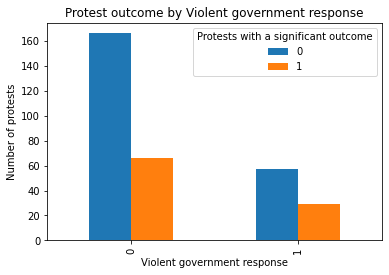

In [129]:
pd.crosstab(protests['Violent government response'], protests['Protests with a significant outcome']).plot(kind = 'bar')
plt.ylabel('Number of protests')
plt.title('Protest outcome by Violent government response')

In [130]:
protests.groupby(['Protests with a significant outcome', 'Degree_of_freedom'])['Protest/population_ratio'].mean()

Protests with a significant outcome  Degree_of_freedom
0                                    1                    0.000089
                                     2                    0.000475
                                     3                    0.000208
1                                    1                    0.000128
                                     2                    0.000211
                                     3                    0.000129
Name: Protest/population_ratio, dtype: float64

In [131]:
protests.groupby(['Protests with a significant outcome', 'Degree_of_freedom'])['Type_of_partitipants'].mean()

Protests with a significant outcome  Degree_of_freedom
0                                    1                    1.938462
                                     2                    1.988095
                                     3                    2.067568
1                                    1                    2.206897
                                     2                    2.314286
                                     3                    2.064516
Name: Type_of_partitipants, dtype: float64

In [132]:
protests.groupby('Protests with a significant outcome')['Political motivation?'].mean()

Protests with a significant outcome
0    0.892377
1    0.810526
Name: Political motivation?, dtype: float64

Text(0.5, 1.0, 'Protest outcome by political motivation')

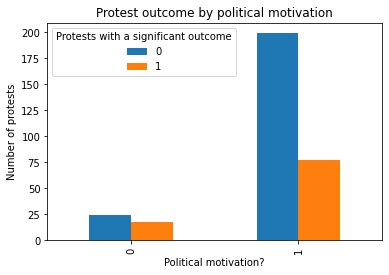

In [133]:
pd.crosstab(protests['Political motivation?'], protests['Protests with a significant outcome']).plot(kind = 'bar')
plt.ylabel('Number of protests')
plt.title('Protest outcome by political motivation')

In [134]:
protests.groupby('Protests with a significant outcome')['Economic motivation?'].mean()

Protests with a significant outcome
0    0.327354
1    0.442105
Name: Economic motivation?, dtype: float64

Text(0.5, 1.0, 'Protest outcome by economic motivation')

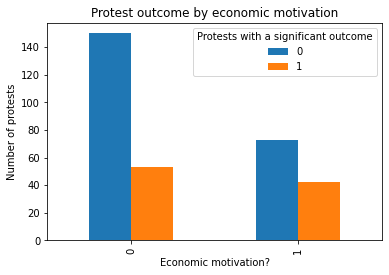

In [135]:
pd.crosstab(protests['Economic motivation?'], protests['Protests with a significant outcome']).plot(kind = 'bar')
plt.ylabel('Number of protests')
plt.title('Protest outcome by economic motivation')

In [136]:
protests.groupby('Protests with a significant outcome')['Corruption motivation?'].mean()

Protests with a significant outcome
0    0.161435
1    0.294737
Name: Corruption motivation?, dtype: float64

Text(0.5, 1.0, 'Protest outcome by corruption motivation')

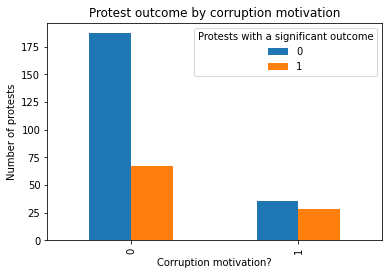

In [137]:
pd.crosstab(protests['Corruption motivation?'], protests['Protests with a significant outcome']).plot(kind = 'bar')
plt.ylabel('Number of protests')
plt.title('Protest outcome by corruption motivation')

# Модель

In [138]:
protests.columns

Index(['Country', 'Protest Name', 'Start Date', 'Freedom Rating (Status)',
       'Triggers', 'Motivations', 'Peak Size', 'Key Participants', 'Duration',
       'Outcomes', 'Active protests', 'Economic motivation?',
       'Political motivation?', 'Corruption motivation?', 'Size category',
       'Protests with a significant outcome',
       'Large protests (Over 100,000 protesting)',
       'Violent government response', 'Long protests (more than 3 months)',
       'Coronavirus-related protests', 'Capital city', 'Days_of_duration',
       'Type_of_partitipants', 'Degree_of_freedom', 'Size_in_1000',
       'Population_in_1000', 'Protest/population_ratio'],
      dtype='object')

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


predictors = protests[[ 'Days_of_duration',
       'Type_of_partitipants', 'Degree_of_freedom', 'Size_in_1000','Violent government response','Economic motivation?',
       'Political motivation?', 'Corruption motivation?', 'Protest/population_ratio']]
target = protests['Protests with a significant outcome']




X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.3, random_state = 42)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [140]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train)*100, 2)
print('Accuracy of logreg:', acc_log,'%')

Accuracy of logreg: 73.42 %


In [141]:
train_df = protests[[ 'Protests with a significant outcome','Days_of_duration',
       'Type_of_partitipants', 'Degree_of_freedom', 'Size_in_1000','Violent government response','Economic motivation?',
       'Political motivation?', 'Corruption motivation?', 'Protest/population_ratio']]

coef_df = pd.DataFrame(train_df.columns.delete(0))
coef_df.columns = ['Feature']
coef_df['Coef'] = pd.Series(logreg.coef_[0])
coef_df.sort_values(by='Coef', ascending=False)

,Feature,Coef
3,Size_in_1000,0.343795
7,Corruption motivation?,0.318183
1,Type_of_partitipants,0.260365
4,Violent government response,0.159284
5,Economic motivation?,-0.046568
2,Degree_of_freedom,-0.051636
0,Days_of_duration,-0.090685
6,Political motivation?,-0.320126
8,Protest/population_ratio,-0.624627


In [142]:
train_df.corr()

,Protests with a significant outcome,Days_of_duration,Type_of_partitipants,Degree_of_freedom,Size_in_1000,Violent government response,Economic motivation?,Political motivation?,Corruption motivation?,Protest/population_ratio
Protests with a significant outcome,1.000000,0.024877,0.100115,-0.011181,0.172086,0.051169,0.109313,-0.110651,0.152175,-0.069230
Days_of_duration,0.024877,1.000000,-0.046309,0.028636,0.205829,0.124063,0.098282,-0.025041,0.028175,-0.037778
Type_of_partitipants,0.100115,-0.046309,1.000000,0.018898,0.044733,-0.008814,0.122607,-0.096404,0.010088,-0.047247
Degree_of_freedom,-0.011181,0.028636,0.018898,1.000000,0.026300,-0.098312,-0.049506,-0.006431,-0.091440,0.038106
Size_in_1000,0.172086,0.205829,0.044733,0.026300,1.000000,0.066656,0.145928,0.007227,0.205388,0.287054
Violent government response,0.051169,0.124063,-0.008814,-0.098312,0.066656,1.000000,-0.001483,0.070226,-0.058414,-0.041554
Economic motivation?,0.109313,0.098282,0.122607,-0.049506,0.145928,-0.001483,1.000000,-0.402301,0.111906,0.106435
Political motivation?,-0.110651,-0.025041,-0.096404,-0.006431,0.007227,0.070226,-0.402301,1.000000,-0.035841,-0.022611
Corruption motivation?,0.152175,0.028175,0.010088,-0.091440,0.205388,-0.058414,0.111906,-0.035841,1.000000,-0.039536
Protest/population_ratio,-0.069230,-0.037778,-0.047247,0.038106,0.287054,-0.041554,0.106435,-0.022611,-0.039536,1.000000


In [143]:
y_test.shape

(96,)

In [144]:
from sklearn.metrics import confusion_matrix
confmatrix = confusion_matrix(y_test, y_pred)
print(confmatrix)

[[59  6]
 [26  5]]


In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.91      0.79        65
           1       0.45      0.16      0.24        31

    accuracy                           0.67        96
   macro avg       0.57      0.53      0.51        96
weighted avg       0.62      0.67      0.61        96



In [146]:
import numpy as np
from scipy import stats
t = protests[['Protests with a significant outcome','Days_of_duration',
       'Type_of_partitipants', 'Degree_of_freedom', 'Size_in_1000','Violent government response','Economic motivation?',
       'Political motivation?', 'Corruption motivation?', 'Protest/population_ratio']]
t = t[(np.abs(stats.zscore(t)) < 3).all(axis=1)]
predictors = t.drop('Protests with a significant outcome', axis = 1)
targ = t['Protests with a significant outcome']


In [147]:
X_train, X_test, y_train, y_test = train_test_split(predictors, targ, test_size = 0.3, random_state = 42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train)*100, 2)
print('Accuracy of logreg:', acc_log,'%')

Accuracy of logreg: 73.36 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [148]:
from sklearn.metrics import confusion_matrix
confmatrix = confusion_matrix(y_test, y_pred)
print(confmatrix)

[[60  6]
 [22  4]]


In [149]:
y_test.head(30)

189    0
161    0
118    0
210    0
64     1
9      0
126    0
164    1
174    0
37     1
5      0
105    0
49     0
184    0
125    0
50     1
132    1
202    1
263    0
150    0
243    0
284    0
260    0
29     0
154    0
235    0
3      1
77     0
297    1
116    0
Name: Protests with a significant outcome, dtype: int64

In [150]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])